### Image Grid

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file1 = input("Enter a rgb image filename:")
file2 = input("Enter output image filename:")

In [3]:
data = cv2.imread(file1)
data = cv2.cvtColor(data, cv2.COLOR_BGR2RGB)

In [4]:
rows = int(input("Enter the number of rows:"))
cols = int(input("Enter the number of cols:"))

In [5]:
border = int(input("Enter the border size:"))

canvas_shape = np.copy(data.shape)

canvas_shape[0] = data.shape[0] * rows + border * (rows + 1)
canvas_shape[1] = data.shape[1] * cols + border * (cols + 1)

canvas = np.zeros(canvas_shape, dtype=np.uint8)

In [6]:
for r in range(rows):
    for c in range(cols):
        y = (1 + r) * border + r * data.shape[0]
        x = (1 + c) * border + c * data.shape[1]
        canvas[y: y + data.shape[0], x: x + data.shape[1]] = data

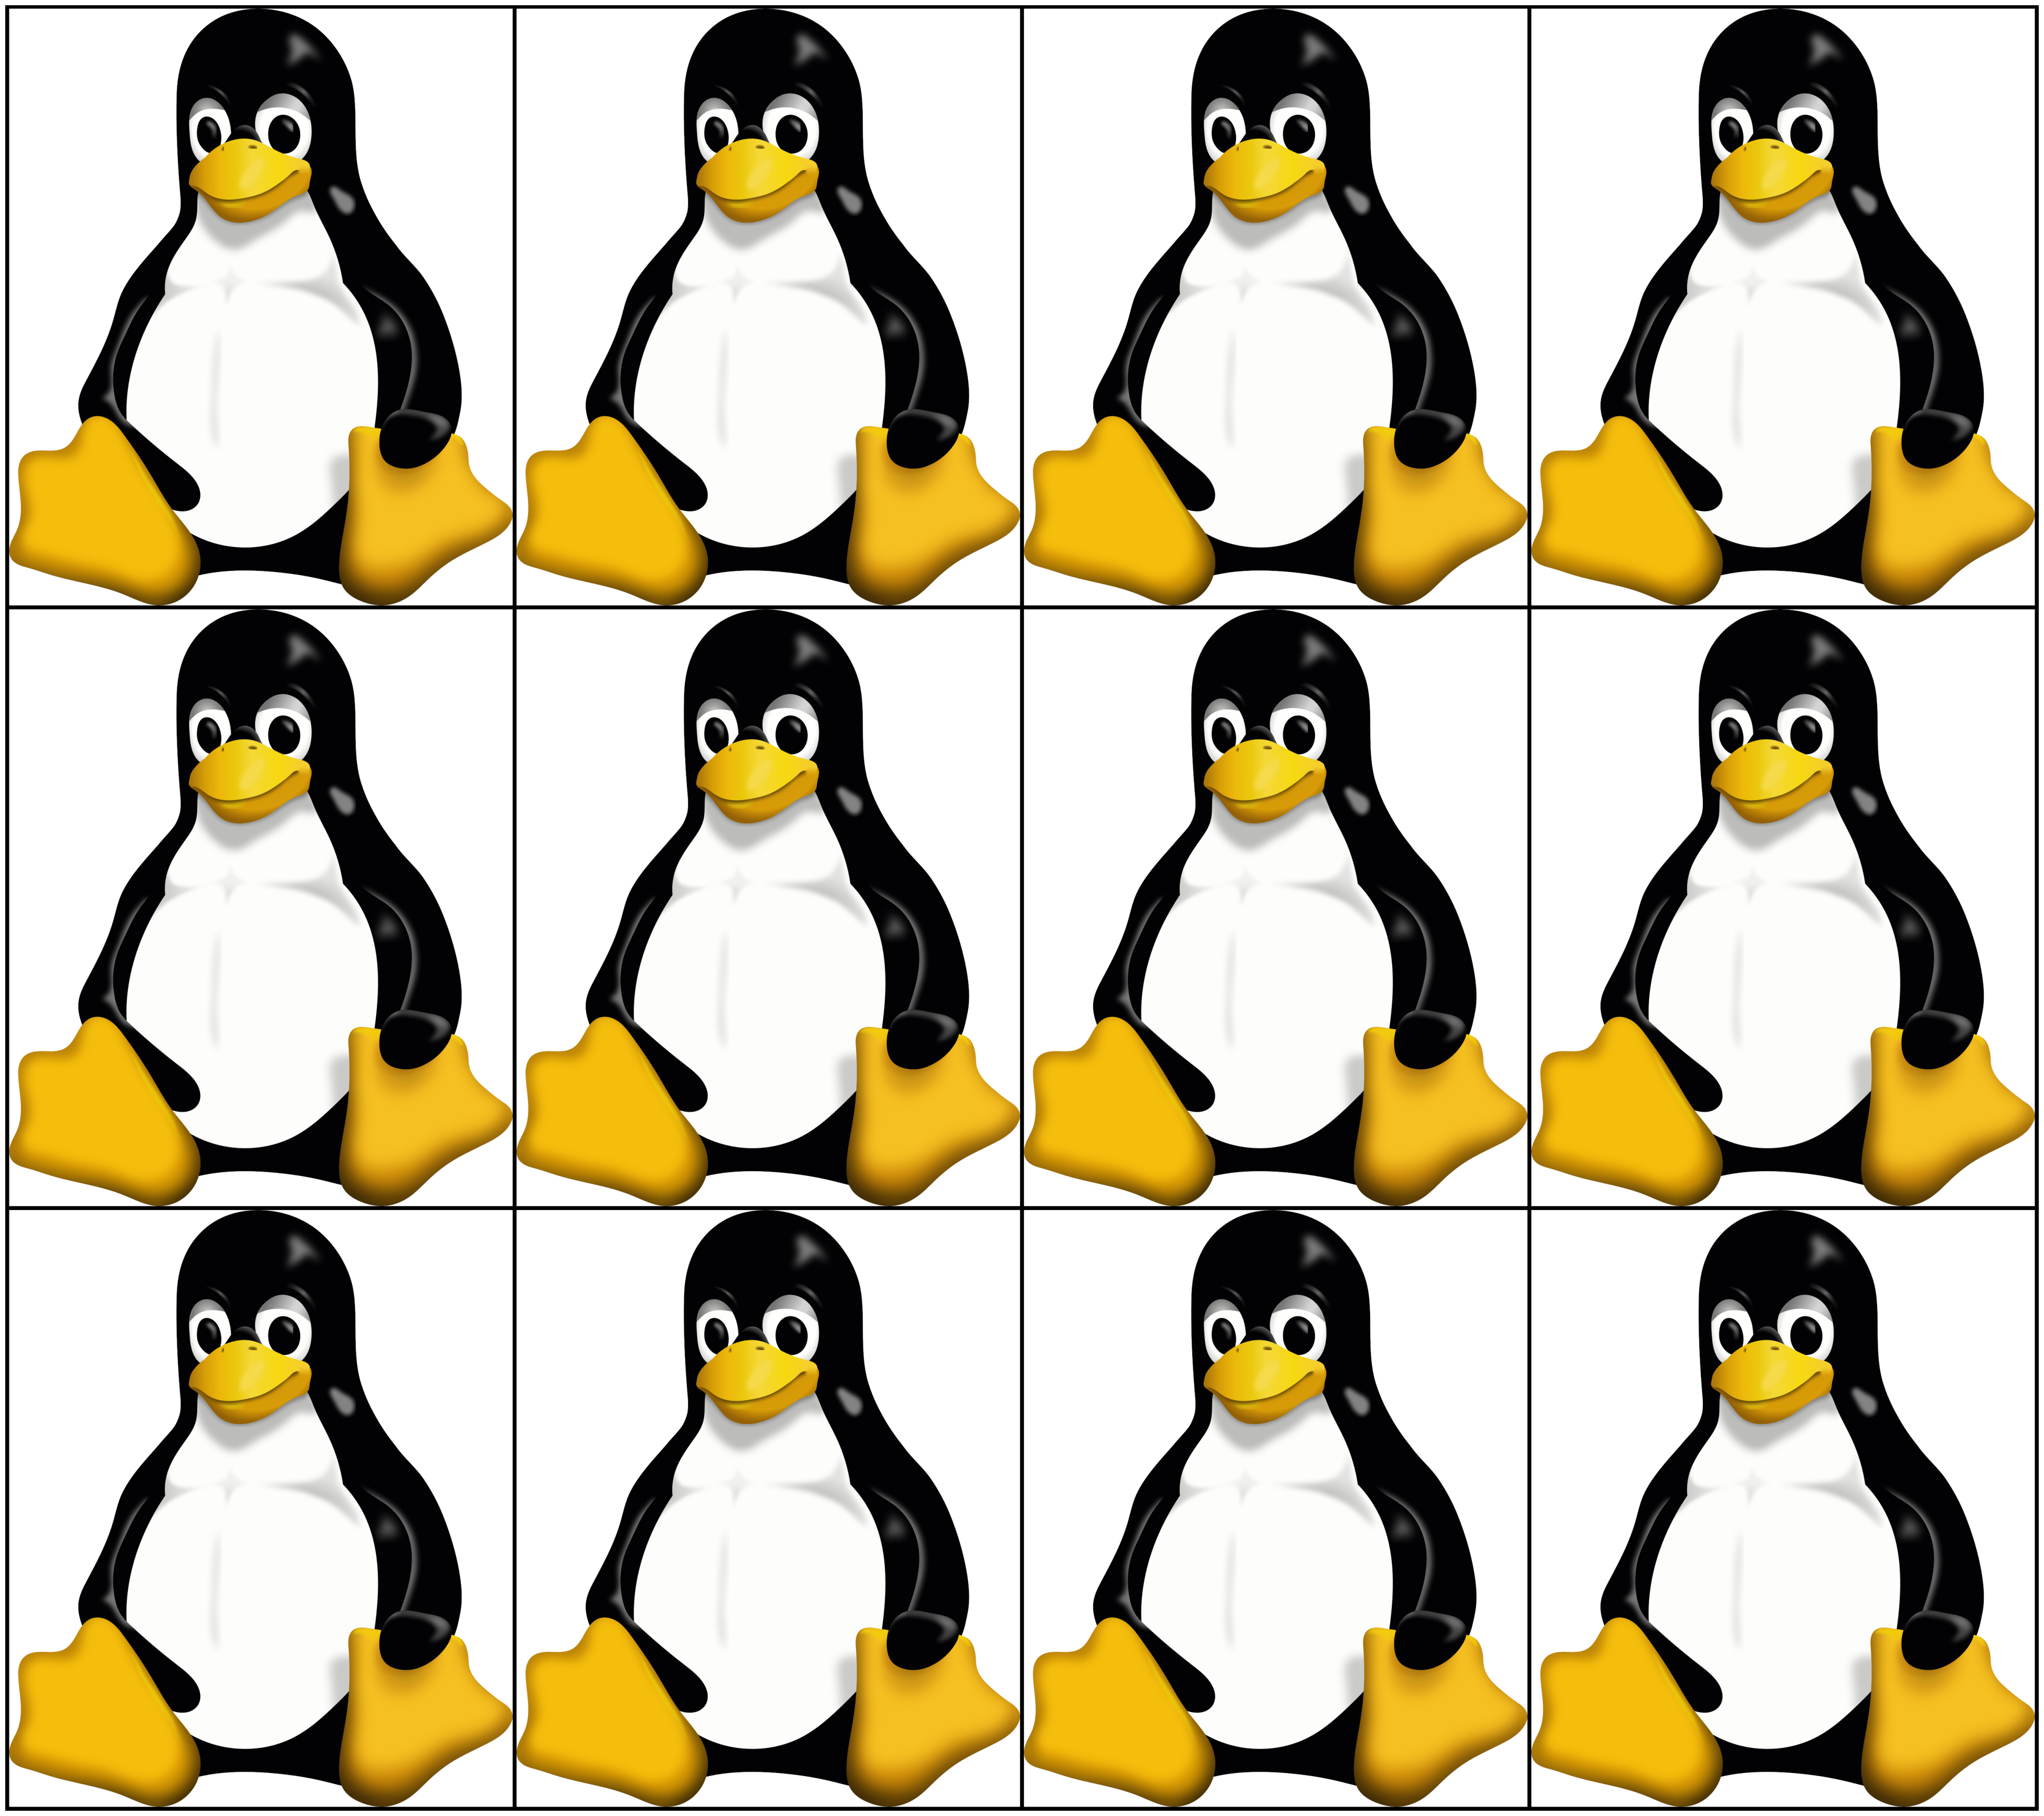

In [7]:
plt.figure(figsize=(50,50))
plt.imshow(canvas)
plt.axis("off")
plt.savefig(file2)
plt.show()

### Blur

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
file1 = input("Enter a rgb image filename:")
file2 = input("Enter output image filename:")

In [10]:
data = cv2.imread(file1, cv2.IMREAD_GRAYSCALE)
blury_img = np.zeros_like(data)

In [11]:
def mean_filter(img, pos_y, pos_x, strength):
    y, x = data.shape
    return np.mean(img[max(pos_y - strength, 0): min(pos_y + strength + 1, y), max(pos_x - strength, 0): min(pos_x + strength + 1, x)])

In [12]:
y, x = data.shape

for r in range(y):
    for c in range(x):
        blury_img[r, c] = mean_filter(data, r, c, 20)

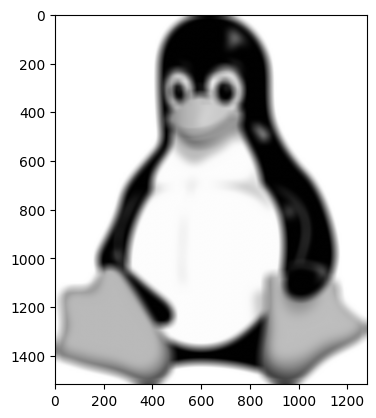

In [13]:
plt.imshow(blury_img, cmap="gray")
plt.savefig(file2)
plt.show()